# PS4 GAMES DATA EXPLORATION

About:

### Import all necessary packages

request - used to request a web page

AsyncHTMLSession - used to request dynamic pages that use java script when loadin

pandas -  an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

BeautifulSoup - a Python library for pulling data out of HTML and XML files.

json - a lightweight data-interchange format.

In [1]:
import requests
from requests_html import AsyncHTMLSession
import pandas as pd
from bs4 import BeautifulSoup
import json

# PART 1: Data Collection

(PLS EDIT) The group will collect data from 3 sites namely ps-timetracker.com for our player data...

## 1.1 Web Scraping ps-timetracker.com

PS-Timetracker is website that details the top 100 games in a monthly categorical manner based primarly on the total number of hours played, additionally, the dataset also includes the total playerbase, as well as the span of an average session. The website includes both singleplayer-genre games and multiplayer-oriented games, and is regularly updated per month.

The first step is to request the page and load it onto BeautifulSoup

In [ ]:
URL="https://ps-timetracker.com/statistic/"

We begin by searching for the required data. We will use January 2021 as the month of interest.

In [ ]:
page=requests.get(URL + "2021-01")
soup = BeautifulSoup(page.content, 'html.parser')

The ps-timetracker data is located on a table with the class "table table-striped"

In [ ]:
ps4_timetables=soup.find("table", {"class": "table table-striped"})

We will find all the rows and store them into an array

In [ ]:
ps4_timetables=ps4_timetables.find_all('tr')

We will then select a random row and view the contents so that we can extract them

In [ ]:
info_row=ps4_timetables[3].contents

In [ ]:
print(info_row)

Each even index of the table contains the \n symbol. The data we are looking for are located on odd indexes.

Index 

1 = Rank, 3 = Chart Movement, 5 =  Game Title, 7 = Hours Played, 9 = Number of Players, 11 = Total Sesssions for the month, and 13 = Average time spent per Session

In [ ]:
# Extract items of interest
Rank=info_row[1].text.strip()
Chart_movement=info_row[3].text.strip()
Title=info_row[5].text.strip()
Hours_Played=info_row[7].text.strip()
Players=info_row[9].text.strip()
Sessions=info_row[11].text.strip()
Avg_Session=info_row[13].text.strip()

print(Rank + " " + Title + " " + " " + Hours_Played + " " + Players + " " + Sessions + " " + Avg_Session)

We will then create a loop to view each row. The headers are stored on index 0 of the table so we will start at index 1.

In [ ]:
info_start = 1
for i in range(info_start, len(ps4_timetables)-1):
    # Extract items of interest
    info_row = ps4_timetables[i].contents
    Rank=info_row[1].text.strip()
    Chart_movement=info_row[3].text.strip()
    Title=info_row[5].text.strip()
    Hours_Played=info_row[7].text.strip()
    Players=info_row[9].text.strip()
    Sessions=info_row[11].text.strip()
    Avg_Session=info_row[13].text.strip()
    print(Rank + " " + Title + " " + " " + Hours_Played + " " + Players + " " + Sessions + " " + Avg_Session)

### Final Code 1.1

We can see the the Top 100 were able to be  viewed. We will now create the final code which is a double loop. The first loop is for going through each month's page, the format is **"https:// ps-timetracker.com /statistic/YEAR-MONTH"**. The second loop is the same as the on above which collects each row of data.

In [ ]:
ps4_times_json = []
info_start = 1
Year = "2021"
Months = ["01","02","03"]

for i in range(0, len(Months)):
    page=requests.get(URL + Year + "-" + Months[i])
    soup = BeautifulSoup(page.content, 'html.parser')
    ps4_timetables=soup.find("table", {"class": "table table-striped"})
    ps4_timetables=ps4_timetables.find_all('tr')
    
    for j in range(info_start, len(ps4_timetables)-1):
        # Extract items of interest
        info_row = ps4_timetables[j].contents
        Rank=info_row[1].text.strip()
        Chart_Movement=info_row[3].text.strip()
        Title=info_row[5].text.strip()
        Hours_Played=info_row[7].text.strip()
        Players=info_row[9].text.strip()
        Sessions=info_row[11].text.strip()
        Avg_Session=info_row[13].text.strip()

        ps4_times_json.append({
            "Year": Year,
            "Month": Months[i],
            "Rank": Rank,
            "Chart_Movement": Chart_Movement,
            "Title": Title,
            "Hours_Played": Hours_Played,
            "Players": Players,
            "Sessions": Sessions,
            "Avg_Session": Avg_Session
        })

We will save the collected data to a JSON File

In [ ]:
with open('ps4-times.json', 'w') as json_file:
    json.dump(ps4_times_json, json_file)

Viewing the data using a pandas dataframe for verification

In [ ]:
ps4_times_df = pd.json_normalize(ps4_times_json)
ps4_times_df

## 1.2 Web Scraping gamepressure.com

Gamepressure is a gaming news and media platform offering guides and walkthroughs on various consoles and gaming platforms. The games on the PS4 platform were scraped from this website. Aside from the title of the game, tags that define the game, its developer, publisher, mode, release date, game description, and ratings were collected.

### 1.2.1 LINK COLLECTION

The first step is to request the page and load it onto BeautifulSoup

In [ ]:
URL="https://www.gamepressure.com/games/"

The game data are stored on diffent pages, we will first go to the ps4 game list page to collect all the links

In [ ]:
page=requests.get(URL + "ps4" + "/")
soup = BeautifulSoup(page.content, 'html.parser')

The links are stored in a div with class "lista lista-gry"

In [ ]:
ps4_game_links=soup.find("div", {"class": "lista lista-gry"}) 

We will extract each link, which is stored in an anchor with class pic-c", and place them in an array

In [ ]:
ps4_game_links=ps4_game_links.find_all("a", {"class": "pic-c"},href=True) 

A for loop to verify if all the links were collected

In [ ]:
for i in range (0, len(ps4_game_links)):
    print(ps4_game_links[i]['href'])

### Final Code 1.2.1 Link Collection

The final code to collect all links is a double for loop. The outer loop is used to iterate through each page and the inner loop is used to store all the links 

In [ ]:
start_page = 1;
end_page = 21
ps4_links= []

for i in range (start_page, end_page):
    page=requests.get(URL + "ps4" + "/-" + str(i))
    soup = BeautifulSoup(page.content, 'html.parser')
    ps4_game_links=soup.find("div", {"class": "lista lista-gry"}) 
    ps4_game_links=ps4_game_links.find_all("a", {"class": "pic-c"},href=True) 
    
    for j in range (0, len(ps4_game_links)):
        ps4_links.append(ps4_game_links[j]['href'])

In [ ]:
ps4_links[3]

### 1.2.2 GAME DATA

We will now select the first link to look for the game data. We will use an AsyncHTMLSession because the ratings portion requires javascript

In [ ]:
URL="https://www.gamepressure.com"

The amount of time it too for pages to render wasn't tracked, so the timeout was set to 0. However, this code may be modified to select a specific timeout to avoid a page connection failure which would freeze the code.

In [ ]:
from requests_html import AsyncHTMLSession
session = AsyncHTMLSession()
r = await session.get(URL + ps4_links[0])
await r.html.arender(timeout=0) 
print(r.html.raw_html) 

In [ ]:
soup = BeautifulSoup(r.html.raw_html, 'html.parser')

The game data is stored in a section with class "article left"

In [ ]:
game_info=soup.find("section", {"class": "article-left"}) 

The game title is store  on a span with id "game-title-cnt"

In [ ]:
game_title = game_info.find("span", {"id": "game-title-cnt"})
print(game_title.text.strip())

The tags are stored in anchors within a paragraph with class "tagi"

In [ ]:
tags_list = []
tags = game_info.find("p", {"class": "tagi"})
tags = tags.find_all("a")
for i in range(0, len(tags)):
    tags_list.append(tags[i].text.strip())

tags_list

The game developer name is stored in a div with id "game-developer-cnt"

In [ ]:
game_developer = game_info.find("div", {"id": "game-developer-cnt"})
print("developer: " + game_developer.text.strip().replace("developer: ", ""))

The game publisher name is stored in a div with id "game-publisher-cnt"

In [ ]:
game_publisher = game_info.find("div", {"id": "game-publisher-cnt"})
print("publisher: " + game_publisher.text.strip().replace("publisher: ", ""))

The game mode is stored in a div with class "S016-game-info"

In [ ]:
game_mode = game_info.find("div", {"class": "S016-game-info"})
game_mode = game_mode.find_all("p")
print("Game mode: " + game_mode[3].text.strip().replace("Game mode: ", ""))

To get the release date we first enter a div with id "game-dates-cnt". We then find the paragraph with class "p2". Withing this pargraph there are three spans that contain the day,month,and year these spans have classes "s1,s2,3"

In [ ]:
release_date = game_info.find("div", {"id": "game-dates-cnt"})
release_date = release_date.find("p", {"class": "p2"})
release_date_day = release_date.find("span", {"class": "s1"})
release_date_month = release_date.find("span", {"class": "s2"}) 
release_date_year = release_date.find("span", {"class": "s3"})

print("Release date: " + release_date_day.text.strip() + " " + release_date_month.text.strip() + " " + release_date_year.text.strip())

The game description content varies per page. We will just collect all the content and clean it later

In [ ]:
game_description = game_info.find("div", {"id": "game-description-cnt"})
game_description = game_description.text.strip()
game_description

The game rating is stored in spans within a div with id "game-mis-cnt". The firt span (index 0) is the current score, the second span (index 1) is the expected score, both number are stored as the first object (index 0) within the spans.

In [ ]:
game_rating = game_info.find("div", {"id": "game-misc-cnt"})
game_rating = game_rating.find_all("span")

current = game_rating[0].find_all("b")[0].text.strip()
expected = game_rating[1].find_all("b")[0].text.strip()

print("Current Score: " + current)
print("Expected Score: " + expected)

We will close the asynch session that we created

In [ ]:
session.close()

### Final Code 1.2.2 Game Data

The main loop is a single loop which implements all the subcodes above. The loop iterates over all the links and collects the data. It also saves the data into a json file after collection. The collection took 3-4 hours, there is no error checking or time out for the page requests so that may have played a part.

In [ ]:
ps4_games_json = []
URL="https://www.gamepressure.com"

for i in range (0, len(ps4_links)):
    session = AsyncHTMLSession()
    r = await session.get(URL + ps4_links[i])
    await r.html.arender(timeout=0) 
    soup = BeautifulSoup(r.html.raw_html, 'html.parser')
    
    game_info = soup.find("section", {"class": "article-left"}) 
    
    if game_info is not None:
        game_title = game_info.find("span", {"id": "game-title-cnt"})
        if game_title is not None:
            game_title = game_title.text.strip()

        tags_list = []
        tags = game_info.find("p", {"class": "tagi"})
        tags = tags.find_all("a")
        if tags is not None:
            for j in range(0, len(tags)):
                tags_list.append(tags[j].text.strip())

        game_developer = game_info.find("div", {"id": "game-developer-cnt"})
        if game_developer is not None:
            game_developer = game_developer.text.strip().replace("developer: ", "")
 
        game_publisher = game_info.find("div", {"id": "game-publisher-cnt"})
        if game_publisher is not None:
            game_publisher = game_publisher.text.strip().replace("publisher: ", "")

        game_mode = game_info.find("div", {"class": "S016-game-info"})
        game_mode = game_mode.find_all("p")
        if(len(game_mode) >= 4):
            game_mode = game_mode[3].text.strip().replace("Game mode: ", "")
        else:
            game_mode = None

        release_date = game_info.find("div", {"id": "game-dates-cnt"})
        release_date = release_date.find("p", {"class": "p2"})
        release_date_day = None
        release_date_month = None
        release_date_year = None
        if release_date.find("span", {"class": "s1"}) is not None:
            release_date_day = release_date.find("span", {"class": "s1"}).text.strip()
        if release_date.find("span", {"class": "s2"}) is not None:
            release_date_month = release_date.find("span", {"class": "s2"}).text.strip()
        if release_date.find("span", {"class": "s3"}) is not None:
            release_date_year = release_date.find("span", {"class": "s3"}).text.strip()

        game_description = game_info.find("div", {"id": "game-description-cnt"})
        if game_description is not None:
            game_description = game_description.text.strip()
        else:
            game_description = None


        game_rating = game_info.find("div", {"id": "game-misc-cnt"})
        if game_rating is not  None:
            game_rating = game_rating.find_all("span")

            if game_rating is None:
                current = None
                expected = None
            elif(len(game_rating) == 2):
                current = game_rating[0].find_all("b")[0].text.strip()
                expected = game_rating[1].find_all("b")[0].text.strip()
            elif (len(game_rating) == 1):
                current = None
                expected = game_rating[0].find_all("b")[0].text.strip()


        ps4_games_json.append({
                "Title":  game_title,
                "Tags": tags_list,
                "Developer": game_developer,
                "Publisher": game_publisher,
                "Mode": game_mode,
                "Release_Date_Day": release_date_day,
                "Release_Date_Month": release_date_month,
                "Release_Date_Year": release_date_year,
                "Game_Description": game_description,
                "Expected_Rating": expected,
                "Current_Rating": current
        })

    await session.close()
    
with open('ps4-games.json', 'w') as json_file:
    json.dump(ps4_games_json, json_file)

We will view the data in a pandas dataframe for verification

In [ ]:
ps4_times_df = pd.json_normalize(ps4_games_json)
ps4_times_df

## 1.3 Web scraping VGchartz

VGCharts is game coverage website that categorizes details of certain games into a database. Details include the platform, title, total shipped, sales from NA region, PAL region, Japan region, and other regions, as well as its total sales.

We will first create an array with keywords for the consoles

In [ ]:
console = ["XOne", "PS4", "PC", "NS"]

We will search for the data using a randomly selected console. VGchartz is a database so the following filters were applied:

(insert filters)

In [ ]:
URL = "https://www.vgchartz.com/games/games.php?name=&keyword=&console=" + console[0] + "&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=No&results=15000&order=Sales&showtotalsales=0&showtotalsales=1&showpublisher=0&showvgchartzscore=0&shownasales=0&shownasales=1&showdeveloper=0&showcriticscore=0&showpalsales=0&showpalsales=1&showreleasedate=0&showuserscore=0&showjapansales=0&showjapansales=1&showlastupdate=0&showothersales=0&showothersales=1&showshipped=0&showshipped=1"

The VGChartz database is slow and is prone to server errors. We will set a timeout of 300 and check for status code 200/Success

In [ ]:
status = 0
while(status!=200):
    try: 
        page = requests.get(URL, timeout=300)
        status = page.status_code
    except requests.exceptions.Timeout as err:
        status = 200
soup = BeautifulSoup(page.content, 'html.parser')
soup

The data is stored in a table, there is no ID so we will just get all table rows

In [ ]:
sales_table = soup.find_all("tr")

The first 27 table rows contain random elements from the website, the sales data begins at row 28 and ends at rows-1

In [ ]:
size = len(sales_table) - 1

In [ ]:
sales_table = sales_table[27:size]

In [ ]:
len(sales_table)

After extracting the rows, we will now select a random item to extract the sales data

In [ ]:
item = sales_table[0]

We will find all the items in each row and store them in an array

In [ ]:
item = item.find_all("td")

The data is stored from index 0-9, excluding index 1 becuase this is just the number of the game on the list of games and index 3 which is (PLEASE CHECK).

Index 0 = game publisher, Index 2 = game title, Index 4 = total number of copies shipped, Index 5 is the total amount of sales in millions, Index 6-9 are specific sales in millions for North America, PAL, Japan, and Others. 

In [ ]:
sales_publisher = console[0]
sales_title = item[2].text.strip()
sales_total_shipped = item[4].text.strip()
sales_total_sales = item[5].text.strip()
sales_NA_sales = item[6].text.strip()
sales_PAL_sales = item[7].text.strip()
sales_Japan_sales = item[8].text.strip()
sales_Other_sales = item[9].text.strip()


print(sales_publisher + " " + sales_title + " " + sales_total_shipped + " " + 
      sales_total_sales + " " + sales_NA_sales + " " + sales_PAL_sales + " " +
     sales_Japan_sales + " " + sales_Other_sales)

### Final Code 1.3

The main code is a double loop, the outer loop queries for 15,000 objects from each console and the inner loop collects the data. After collecting the data, it is stored in a json file

In [ ]:
console = ["XOne", "PS4", "PC", "NS"]
ps4_sales_json = []

for i in range (0, len(console)):
    URL = "https://www.vgchartz.com/games/games.php?name=&keyword=&console=" + console[i] + "&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=No&results=15000&order=Sales&showtotalsales=0&showtotalsales=1&showpublisher=0&showvgchartzscore=0&shownasales=0&shownasales=1&showdeveloper=0&showcriticscore=0&showpalsales=0&showpalsales=1&showreleasedate=0&showuserscore=0&showjapansales=0&showjapansales=1&showlastupdate=0&showothersales=0&showothersales=1&showshipped=0&showshipped=1"
    status = 0
    while(status!=200):
        try: 
            page = requests.get(URL, timeout=300)
            status = page.status_code
        except requests.exceptions.Timeout as err:
            status = 200
    soup = BeautifulSoup(page.content, 'html.parser')
    sales_table = soup.find_all("tr")
    size = len(sales_table) - 1
    sales_table = sales_table[27:size]
    
    for j in range (0, len(sales_table)):
        item = sales_table[j]
        item = item.find_all("td")
        sales_publisher = console[i]
        sales_title = item[2].text.strip()
        sales_total_shipped = item[4].text.strip()
        sales_total_sales = item[5].text.strip()
        sales_NA_sales = item[6].text.strip()
        sales_PAL_sales = item[7].text.strip()
        sales_Japan_sales = item[8].text.strip()
        sales_Other_sales = item[9].text.strip()

        ps4_sales_json.append({
            
            "Publisher": sales_publisher,
            "Title": sales_title,
            "Total_Shipped": sales_total_shipped,
            "Total_Sales": sales_total_sales,
            "NA_Sales": sales_NA_sales,
            "PAL_Sales": sales_PAL_sales,
            "Japan_Sales": sales_Japan_sales,
            "Other_Sales": sales_Other_sales 
             
        })
        
with open('ps4-sales.json', 'w') as json_file:
    json.dump(ps4_sales_json, json_file)

### After Checking Files

In [134]:
missing = ['https://www.gamepressure.com/games/black-desert-online/zf335d#ps4',
'https://www.gamepressure.com/games/brawlhalla/zf45a5#ps4',
'https://www.gamepressure.com/games/call-of-duty-black-ops-iiii/zf51ed#ps4',
'https://www.gamepressure.com/games/call-of-duty-black-ops-cold-war/z45a8f#ps4',
'https://www.gamepressure.com/games/call-of-duty-black-ops-iii/z03fb5#ps4',
'https://www.gamepressure.com/games/conan-exiles/z04624#ps4',
'https://www.gamepressure.com/games/demons-souls-remake/ze5be2', 
'https://www.gamepressure.com/games/destruction-allstars/z15be5',
'https://www.gamepressure.com/games/diablo-iii-reaper-of-souls-ultimate-evil-edition/z1391d#ps4',
'https://www.gamepressure.com/games/dying-light-the-following/z543f8#ps4',
'https://www.gamepressure.com/games/efootbal-pes-2021-season-update/z25c64',
'https://www.gamepressure.com/games/enter-the-gungeon/z13f5c#ps4',
'https://www.gamepressure.com/games/final-fantasy-xiv-a-realm-reborn/zd922#ps4',
'https://www.gamepressure.com/games/gran-turismo-sport/zd4522',
'https://www.gamepressure.com/games/hollow-knight/z14b7d#ps4',
'https://www.gamepressure.com/games/hunt-showdown/z03d4e#ps4',
'https://www.gamepressure.com/games/immortals-fenyx-rising/zf5820#ps4',
'https://www.gamepressure.com/games/madden-nfl-21/z55b86#ps4',
'https://www.gamepressure.com/games/maneater/zd53cb#ps4',
'https://www.gamepressure.com/games/spider-man/z04831',
'https://www.gamepressure.com/games/spider-man-miles-morales/z25be6#ps4',
'https://www.gamepressure.com/games/monster-hunter-world-iceborne/za579e#ps4',
'https://www.gamepressure.com/games/nba-2k20/z85847#ps4',
'https://www.gamepressure.com/games/outriders/z457d4#ps4',
'https://www.gamepressure.com/games/overwatch/z43ef6#ps4',
'https://www.gamepressure.com/games/paladins-champions-of-the-realm/zd43ea#ps4',
'https://www.gamepressure.com/games/persona-5-scramble-the-phantom-strikers/z75783#ps4',
'https://www.gamepressure.com/games/rise-of-the-tomb-raider/ze3d6a#ps4',
'https://www.gamepressure.com/games/rogue-company/z0591a#ps4',
'https://www.gamepressure.com/games/rust/z23807#ps4',
'https://www.gamepressure.com/games/the-elder-scrolls-v-skyrim-special-edition/z2481e#ps4',
'https://www.gamepressure.com/games/smite/z02de5#ps4',
'https://www.gamepressure.com/games/tom-clancys-rainbow-six-siege/z23d74#ps4',
'https://www.gamepressure.com/games/tom-clancys-ghost-recon-breakpoint/z7578c#ps4',
'https://www.gamepressure.com/games/uncharted-4-a-thiefs-end/ze3a7c',b
'https://www.gamepressure.com/games/warface/z4259d#ps4',
'https://www.gamepressure.com/games/we-were-here/ze4cbe#ps4',
'https://www.gamepressure.com/games/world-of-tanks-mercenaries/z229e2#ps4']

In [193]:
ps4_missing_games_json = []

for i in range (0, len(missing)):
    session = AsyncHTMLSession()
    r = await session.get(missing[i])
    await r.html.arender(timeout=0) 
    soup = BeautifulSoup(r.html.raw_html, 'html.parser')
    
    game_info = soup.find("section", {"class": "article-left"}) 
    
    if game_info is not None:
        game_title = game_info.find("span", {"id": "game-title-cnt"})
        if game_title is not None:
            game_title = game_title.text.strip()

        tags_list = []
        tags = game_info.find("p", {"class": "tagi"})
        tags = tags.find_all("a")
        if tags is not None:
            for j in range(0, len(tags)):
                tags_list.append(tags[j].text.strip())

        game_developer = game_info.find("span", {"id": "game-developer-cnt"})
        if game_developer is not None:
            game_developer = game_developer.text.strip().replace("developer: ", "")
 
        game_publisher = game_info.find("span", {"id": "game-publisher-cnt"})
        if game_publisher is not None:
            game_publisher = game_publisher.text.strip().replace("publisher: ", "")

        game_mode = game_info.find("div", {"id": "game-misc-cnt"})
        game_mode = game_mode.find_all("p")
        game_mode = game_mode[0].find("b")
        game_mode =game_mode.text.strip()

        release_date = game_info.find("div", {"id": "game-dates-cnt"})
        release_date = release_date.find("p", {"class": "p2"})
        release_date_day = None
        release_date_month = None
        release_date_year = None
        if release_date.find("span", {"class": "s1"}) is not None:
            release_date_day = release_date.find("span", {"class": "s1"}).text.strip()
        if release_date.find("span", {"class": "s2"}) is not None:
            release_date_month = release_date.find("span", {"class": "s2"}).text.strip()
        if release_date.find("span", {"class": "s3"}) is not None:
            release_date_year = release_date.find("span", {"class": "s3"}).text.strip()

        game_description = game_info.find("div", {"id": "game-description-cnt"})
        if game_description is not None:
            game_description = game_description.text.strip()
        else:
            game_description = None


        game_rating = game_info.find("div", {"id": "game-misc-cnt"})
       
        if game_rating is not  None:
            game_rating = game_rating.find_all("p")

            if game_rating is None:
                current = None
                expected = None
            elif(len(game_rating) == 3):
                current = game_rating[1].find_all("b")[0].text.strip()
                expected = game_rating[2].find_all("b")[0].text.strip()
            elif (len(game_rating) == 2):
                current = None
                expected = game_rating[1].find_all("b")[0].text.strip()


        ps4_missing_games_json.append({
                "Title":  game_title,
                "Tags": tags_list,
                "Developer": game_developer,
                "Publisher": game_publisher,
                "Mode": game_mode,
                "Release_Date_Day": release_date_day,
                "Release_Date_Month": release_date_month,
                "Release_Date_Year": release_date_year,
                "Game_Description": game_description,
                "Expected_Rating": expected,
                "Current_Rating": current
        })

    await session.close()
    
with open('ps4-games-missing.json', 'w') as json_file:
    json.dump(ps4_missing_games_json, json_file)

# PART 2: Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import json
import datetime

In [3]:
df_ps4_times = pd.read_json('Datasets/ps4-times.json')
df_ps4_games = pd.read_json('Datasets/ps4-games.json')
df_ps4_sales = pd.read_json('Datasets/ps4-sales.json')

In [4]:
df_ps4_games['Title']

0                  Cyberpunk 2077
1              Horizon: Zero Dawn
2                       Days Gone
3      Assassin's Creed: Valhalla
4           Resident Evil Village
                  ...            
474       The King of Fighters XV
475                         Thief
476                Fishing Planet
477                    Watch Dogs
478                  Overcooked 2
Name: Title, Length: 479, dtype: object

In [5]:
Title_cleaned = []
for index, row in df_ps4_times.iterrows():
    row['Title'] = row['Title'].lower()
    row['Title'] = row['Title'].replace('™','')
    row['Title'] = row['Title'].replace('®','')
    row['Title'] = row['Title'].replace(':','')
    row['Title'] = row['Title'].replace('–','')
    #print(row['Title'])
    Title_cleaned.append(row['Title'])
df_ps4_times['Title'] = Title_cleaned

In [6]:
Title_cleaned = []
for index, row in df_ps4_games.iterrows():
    row['Title'] = row['Title'].lower()
    row['Title'] = row['Title'].replace('™','')
    row['Title'] = row['Title'].replace('®','')
    row['Title'] = row['Title'].replace(':','')
    row['Title'] = row['Title'].replace('–','')
    #print(row['Title'])
    Title_cleaned.append(row['Title'])
df_ps4_games['Title'] = Title_cleaned

In [7]:
Title_cleaned = []
for index, row in df_ps4_sales.iterrows():
    row['Title'] = row['Title'].lower()
    row['Title'] = row['Title'].replace('™','')
    row['Title'] = row['Title'].replace('®','')
    row['Title'] = row['Title'].replace(':','')
    row['Title'] = row['Title'].replace('–','')
    row['Title'] = row['Title'].replace(' read the review','')
    #print(row['Title'])
    Title_cleaned.append(row['Title'])
df_ps4_sales['Title'] = Title_cleaned

In [8]:
df_ps4_sales = df_ps4_sales.replace("0.00m",np.NaN)
df_ps4_sales = df_ps4_sales.replace("N/A",np.NaN)
df_ps4_sales = df_ps4_sales.drop_duplicates()
df_ps4_drop_sales = df_ps4_sales[df_ps4_sales["Publisher"] == 'PS4']
df_ps4_drop_sales

,Publisher,Title,Total_Shipped,Total_Sales,NA_Sales,PAL_Sales,Japan_Sales,Other_Sales
1510,PS4,marvel's spider-man,20.00m,NaN,NaN,NaN,NaN,NaN
1511,PS4,grand theft auto v,NaN,19.39m,6.06m,9.71m,0.60m,3.02m
1512,PS4,uncharted 4 a thief's end,16.25m,NaN,NaN,NaN,NaN,NaN
1513,PS4,call of duty black ops 3,NaN,15.09m,6.18m,6.05m,0.41m,2.44m
1514,PS4,red dead redemption 2,NaN,13.94m,5.26m,6.21m,0.21m,2.26m
...,...,...,...,...,...,...,...,...
3782,PS4,ys memories of celceta - kai,NaN,NaN,NaN,NaN,NaN,NaN
3783,PS4,yu-gi-oh! legacy of the duelist,NaN,NaN,NaN,NaN,NaN,NaN
3784,PS4,yuppie psycho,NaN,NaN,NaN,NaN,NaN,NaN
3785,PS4,zombie army 4 dead war,NaN,NaN,NaN,NaN,NaN,NaN


title problem -> lowercase everything, remove trademark/copyright logo, ":" sign, match all string in left to all string rights%

# ™ ® : lowercase

for sales, aggregate into base on title, title get from top 100+ (df_ps4_times)
final fantasy xiv$

 row["Title"]$ = row["Title"]

THISISASTRING........

times ... check how many times it appeared as top 100 most played
if appeared more than once, get average monthly
otherwise, copy paste
counter-> feature -> "number of times appeared as top 100 (appearances)"

In [9]:
#for index, row in df_ps4_times.iterrows():
    #print(row['Title'])

In [10]:
#<300 samples
df_ps4_times_combined = df_ps4_times.sort_values(by=['Title'])
df_ps4_times_combined

,Year,Month,Rank,Chart_Movement,Title,Hours_Played,Players,Sessions,Avg_Session
100,2021,2,1,+6,apex legends,94616,3342,59571,1:36
201,2021,3,2,-1,apex legends,92103,3673,63635,1:27
6,2021,1,7,+2,apex legends,51898,2389,35661,1:28
111,2021,2,12,+2,ark survival evolved,30138,879,10604,2:51
13,2021,1,14,+4,ark survival evolved,28825,830,10105,2:52
...,...,...,...,...,...,...,...,...,...
183,2021,2,84,NEW,we were here,2857,1582,2782,1:02
191,2021,2,92,NEW,world of tanks,2563,215,1749,1:28
296,2021,3,97,-5,world of tanks,2737,244,2098,1:19
68,2021,1,69,-17,yakuza like a dragon,4333,157,1788,2:26


In [11]:
Avg_Session_Seconds = []
for index, row in df_ps4_times_combined.iterrows():
    row['Avg_Session'] += ":00"
    h,m,s = row['Avg_Session'].split(':')
    row['Avg_Session'] = int(datetime.timedelta(hours=int(h),minutes=int(m),seconds=int(s)).total_seconds())
    Avg_Session_Seconds.append(row['Avg_Session'])

df_ps4_times_combined["Avg_Session_Seconds"] = Avg_Session_Seconds

In [12]:
df_ps4_times_combined

,Year,Month,Rank,Chart_Movement,Title,Hours_Played,Players,Sessions,Avg_Session,Avg_Session_Seconds
100,2021,2,1,+6,apex legends,94616,3342,59571,1:36,5760
201,2021,3,2,-1,apex legends,92103,3673,63635,1:27,5220
6,2021,1,7,+2,apex legends,51898,2389,35661,1:28,5280
111,2021,2,12,+2,ark survival evolved,30138,879,10604,2:51,10260
13,2021,1,14,+4,ark survival evolved,28825,830,10105,2:52,10320
...,...,...,...,...,...,...,...,...,...,...
183,2021,2,84,NEW,we were here,2857,1582,2782,1:02,3720
191,2021,2,92,NEW,world of tanks,2563,215,1749,1:28,5280
296,2021,3,97,-5,world of tanks,2737,244,2098,1:19,4740
68,2021,1,69,-17,yakuza like a dragon,4333,157,1788,2:26,8760


In [13]:
df_ps4_times_average = df_ps4_times_combined.groupby('Title').agg(
    # Get max of the duration column for each group
    Hours_Played=('Hours_Played', 'mean'),
    Players=('Players', 'mean'),
    Sessions=('Sessions', 'mean'),  
    Avg_Session_Seconds=('Avg_Session_Seconds', 'mean'),  
    Count=('Title','count')
)

df_ps4_times_average

,Hours_Played,Players,Sessions,Avg_Session_Seconds,Count
Title,,,,,
apex legends,79539.000000,3134.666667,52955.666667,5420,3
ark survival evolved,29608.333333,854.333333,10634.666667,10080,3
assassin's creed odyssey,6360.000000,424.666667,3168.000000,7260,3
assassin's creed origins,3421.000000,281.000000,1777.000000,6960,3
assassin's creed the ezio collection,3253.000000,174.000000,1474.000000,7980,1
...,...,...,...,...,...
warframe,5736.666667,315.333333,3394.333333,6120,3
watch dogs legion,4527.666667,701.000000,3218.000000,5480,3
we were here,2857.000000,1582.000000,2782.000000,3720,1


In [14]:
#for index, row in df_ps4_times_average.iterrows():
    #print(row.name)

In [15]:
df_ps4_combined = df_ps4_times_average.merge(df_ps4_games, on='Title', how='left')

In [16]:
df_ps4_combined

,Title,Hours_Played,Players,Sessions,Avg_Session_Seconds,Count,Tags,Developer,Publisher,Mode,Release_Date_Day,Release_Date_Month,Release_Date_Year,Game_Description,Expected_Rating,Current_Rating
0,apex legends,79539.000000,3134.666667,52955.666667,5420,3,"[Action, FPP, science fiction, play for free, ...",Respawn Entertainment,Electronic Arts Inc.,multiplayer,4.0,February,2019,Apex Legends is a free-to-play online FPP shoo...,4.1,NaN
1,ark survival evolved,29608.333333,854.333333,10634.666667,10080,3,"[Action, FPP, dinosaurs, sandbox, RPG elements...",Studio Wildcard,Studio Wildcard,single / multiplayer,29.0,August,2017,ARK: Survival Evolved is a sandbox survival si...,8.6,5.400
2,assassin's creed odyssey,6360.000000,424.666667,3168.000000,7260,3,"[RPG, TPP, Stealth, sandbox, Ancient history, ...",Ubisoft,Ubisoft,single player,5.0,October,2018,Assassin's Creed Odyssey is the eleventh large...,7.3,7.165
3,assassin's creed origins,3421.000000,281.000000,1777.000000,6960,3,"[Action, TPP, science fiction, Stealth, sandbo...",Ubisoft,Ubisoft,single player,27.0,October,2017,Ubisoft bases its operations on both new and t...,8.3,8.250
4,assassin's creed the ezio collection,3253.000000,174.000000,1474.000000,7980,1,"[Action, TPP, science fiction, Stealth, packag...",Ubisoft,Ubisoft,single player,15.0,November,2016,Assassin's Creed: The Ezio Collection for PS4 ...,8.8,6.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,warframe,5736.666667,315.333333,3394.333333,6120,3,"[Action, TPP, science fiction, play for free, ...",Digital Extremes,Digital Extremes,massive online multiplayer,15.0,November,2013,Warframe is a cooperative science-fiction shoo...,7.6,6.700
118,watch dogs legion,4527.666667,701.000000,3218.000000,5480,3,"[Action, TPP, cyberpunk, science fiction, Stea...",Ubisoft,Ubisoft,single / multiplayer,29.0,October,2020,Watch Dogs Legion is an action game with an op...,4.4,6.940
119,we were here,2857.000000,1582.000000,2782.000000,3720,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,world of tanks,2650.000000,229.500000,1923.500000,5010,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_ps4_combined_sales = df_ps4_combined.merge(df_ps4_drop_sales, on='Title', how='left')

combined <--> games = 
loop kukunin isang row ni combined (get the title[1..n])
if title exists in games, get

combined <--> sales =

In [18]:
df_ps4_combined_sales

,Title,Hours_Played,Players,Sessions,Avg_Session_Seconds,Count,Tags,Developer,Publisher_x,Mode,...,Game_Description,Expected_Rating,Current_Rating,Publisher_y,Total_Shipped,Total_Sales,NA_Sales,PAL_Sales,Japan_Sales,Other_Sales
0,apex legends,79539.000000,3134.666667,52955.666667,5420,3,"[Action, FPP, science fiction, play for free, ...",Respawn Entertainment,Electronic Arts Inc.,multiplayer,...,Apex Legends is a free-to-play online FPP shoo...,4.1,NaN,PS4,NaN,NaN,NaN,NaN,NaN,NaN
1,ark survival evolved,29608.333333,854.333333,10634.666667,10080,3,"[Action, FPP, dinosaurs, sandbox, RPG elements...",Studio Wildcard,Studio Wildcard,single / multiplayer,...,ARK: Survival Evolved is a sandbox survival si...,8.6,5.400,PS4,1.00m,NaN,NaN,NaN,NaN,NaN
2,assassin's creed odyssey,6360.000000,424.666667,3168.000000,7260,3,"[RPG, TPP, Stealth, sandbox, Ancient history, ...",Ubisoft,Ubisoft,single player,...,Assassin's Creed Odyssey is the eleventh large...,7.3,7.165,PS4,NaN,3.18m,1.18m,1.40m,0.09m,0.51m
3,assassin's creed origins,3421.000000,281.000000,1777.000000,6960,3,"[Action, TPP, science fiction, Stealth, sandbo...",Ubisoft,Ubisoft,single player,...,Ubisoft bases its operations on both new and t...,8.3,8.250,PS4,NaN,4.06m,1.22m,2.11m,0.11m,0.63m
4,assassin's creed the ezio collection,3253.000000,174.000000,1474.000000,7980,1,"[Action, TPP, science fiction, Stealth, packag...",Ubisoft,Ubisoft,single player,...,Assassin's Creed: The Ezio Collection for PS4 ...,8.8,6.950,PS4,NaN,0.79m,0.14m,0.52m,0.02m,0.12m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,warframe,5736.666667,315.333333,3394.333333,6120,3,"[Action, TPP, science fiction, play for free, ...",Digital Extremes,Digital Extremes,massive online multiplayer,...,Warframe is a cooperative science-fiction shoo...,7.6,6.700,PS4,NaN,NaN,NaN,NaN,NaN,NaN
118,watch dogs legion,4527.666667,701.000000,3218.000000,5480,3,"[Action, TPP, cyberpunk, science fiction, Stea...",Ubisoft,Ubisoft,single / multiplayer,...,Watch Dogs Legion is an action game with an op...,4.4,6.940,PS4,NaN,NaN,NaN,NaN,NaN,NaN
119,we were here,2857.000000,1582.000000,2782.000000,3720,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,world of tanks,2650.000000,229.500000,1923.500000,5010,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df1 = df_ps4_combined_sales[df_ps4_combined_sales["Tags"].isna()]

pls drop share play (not a game, recording software for ps4)

In [20]:
df1

,Title,Hours_Played,Players,Sessions,Avg_Session_Seconds,Count,Tags,Developer,Publisher_x,Mode,...,Game_Description,Expected_Rating,Current_Rating,Publisher_y,Total_Shipped,Total_Sales,NA_Sales,PAL_Sales,Japan_Sales,Other_Sales
9,black desert,2985.000000,112.500000,986.500000,11040,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,brawlhalla,6165.333333,849.666667,7013.666667,3180,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,call of duty black ops 4,3397.000000,444.666667,2530.666667,4860,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,call of duty black ops cold war,84386.000000,4041.333333,54989.000000,5560,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,call of duty black ops iii,5060.000000,980.666667,4687.666667,3920,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,conan exiles,2899.000000,150.000000,1104.500000,9420,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,PS4,NaN,0.21m,0.05m,0.05m,0.09m,0.02m
28,demon's souls,4493.666667,356.333333,2984.000000,5460,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,destruction allstars,3724.000000,1393.000000,4972.000000,2700,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,diablo iii reaper of souls ultimate evil edition,2593.500000,248.500000,1321.000000,7110,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,dying light the following enhanced edition,2756.000000,253.000000,1479.000000,6720,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What are the games on the PS4 top 100 most played games (hours played) list for the first quarter of 2021?

To achieve this, we must sort the list of games in descending order by 'Hours_Played'.

In [21]:
df_ps4_combined_sales = df_ps4_combined_sales.sort_values(by=['Hours_Played'], ascending=False)
df_ps4_combined_sales

,Title,Hours_Played,Players,Sessions,Avg_Session_Seconds,Count,Tags,Developer,Publisher_x,Mode,...,Game_Description,Expected_Rating,Current_Rating,Publisher_y,Total_Shipped,Total_Sales,NA_Sales,PAL_Sales,Japan_Sales,Other_Sales
51,fortnite,93548.333333,4857.000000,71134.333333,4760,3,"[Action, zombie, sandbox, survival, co-op, MMO...",Epic Games,Epic Games,single / multiplayer,...,"Fortnite for PC, PS4 and XONE is a third-perso...",7.2,1.900,PS4,NaN,0.89m,0.42m,0.32m,NaN,0.15m
14,call of duty black ops cold war,84386.000000,4041.333333,54989.000000,5560,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,call of duty modern warfare,80789.333333,4774.666667,56655.666667,5160,3,"[Action, FPP, modern conflicts, FPS, network, ...",Infinity Ward,Activision Blizzard,single / multiplayer,...,Call of Duty: Modern Warfare is an FPS release...,4.6,7.645,PS4,NaN,NaN,NaN,NaN,NaN,NaN
0,apex legends,79539.000000,3134.666667,52955.666667,5420,3,"[Action, FPP, science fiction, play for free, ...",Respawn Entertainment,Electronic Arts Inc.,multiplayer,...,Apex Legends is a free-to-play online FPP shoo...,4.1,NaN,PS4,NaN,NaN,NaN,NaN,NaN,NaN
56,grand theft auto v,78739.333333,4935.666667,45556.000000,6240,3,"[Action, FPP, TPP, vehicles, Gangster, sandbox...",Rockstar Games,Rockstar Games,single player,...,Rockstar Games studio has a few acclaimed game...,7.8,8.950,PS4,NaN,19.39m,6.06m,9.71m,0.60m,3.02m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,world of tanks,2650.000000,229.500000,1923.500000,5010,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,diablo iii reaper of souls ultimate evil edition,2593.500000,248.500000,1321.000000,7110,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,detroit become human,2564.000000,387.000000,1440.000000,6420,1,"[Adventure, TPP, cyberpunk, science fiction, a...",Quantic Dream,Sony Interactive Entertainment,single player,...,Detroit: Become Human for PS4 is another adven...,9.1,7.305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,ea sports ufc 3,2509.500000,487.500000,2632.500000,3480,2,"[Sports, MMA, for 2 people, splitscreen, EA Play]",EA Sports,Electronic Arts Inc.,single / multiplayer,...,"As the title itself might suggest, EA Sports U...",7.3,5.400,PS4,NaN,0.97m,0.40m,0.41m,0.01m,0.16m


We only need to acquire the 'Title' and 'Hours_Played' from the dataframe.

In [22]:
df_most_played = df_ps4_combined_sales[['Hours_Played', 'Title']]
df_most_played

,Hours_Played,Title
51,93548.333333,fortnite
14,84386.000000,call of duty black ops cold war
16,80789.333333,call of duty modern warfare
0,79539.000000,apex legends
56,78739.333333,grand theft auto v
...,...,...
120,2650.000000,world of tanks
32,2593.500000,diablo iii reaper of souls ultimate evil edition
31,2564.000000,detroit become human
36,2509.500000,ea sports ufc 3


Since we are acquiring only the top 100 games, we drop the indexes from the bottom 22 rows.

In [23]:
df_most_played.drop(df_most_played.tail(22).index, inplace=True)
df_most_played

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Hours_Played,Title
51,93548.333333,fortnite
14,84386.000000,call of duty black ops cold war
16,80789.333333,call of duty modern warfare
0,79539.000000,apex legends
56,78739.333333,grand theft auto v
...,...,...
37,3211.666667,efootball pes 2021 season update
65,3190.666667,madden nfl 21
89,3151.000000,rise of the tomb raider
80,3103.500000,outriders - demo


In [24]:
import matplotlib.pyplot as plt

We first split the values in to y and x values for plotting.

In [25]:
x_values = df_most_played['Title']
y_values = df_most_played['Hours_Played']

In [26]:
y_values

51    93548.333333
14    84386.000000
16    80789.333333
0     79539.000000
56    78739.333333
          ...     
37     3211.666667
65     3190.666667
89     3151.000000
80     3103.500000
83     3079.000000
Name: Hours_Played, Length: 100, dtype: float64

In [27]:
x_values

51                            fortnite
14     call of duty black ops cold war
16         call of duty modern warfare
0                         apex legends
56                  grand theft auto v
                    ...               
37    efootball pes 2021 season update
65                       madden nfl 21
89             rise of the tomb raider
80                    outriders - demo
83                           persona 5
Name: Title, Length: 100, dtype: object

In [28]:
#get the index as column
#x_values_index = x_values
#x_values_index = df_most_played.drop(['Title', 'Hours_Played'], axis=1)
#x_values_index['index1'] = x_values_index.index
#x_values_index = x_values_index['index1']

We display the bar graph for the top 100 most played games.

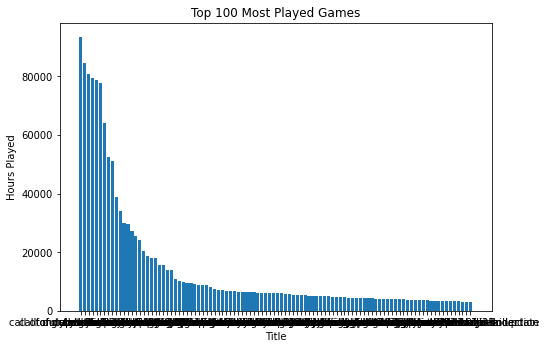

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = x_values
y = y_values
ax.bar(x,y)
plt.xlabel('Title')
plt.ylabel('Hours Played')
plt.title('Top 100 Most Played Games')
plt.show()

From the bar graph seen above, there is an extreme downward trend based on the distribution displayed with only the first percentile having relatively much higher hours played compared to the rest of the games in top 100 most played list.

This shows that there is a stark contrast between the top 10 when compared to the rest and the popularity that comes with the top 10 (or more) is much higher than the rest trailing behind. 

## What are the genres of the most played games (hours played) on the PS4 for the first quarter of 2021? 

In this part of the notebook, we try to find the genres of the 100 most played games on the PS4 for the first quarter of 2021.

In [30]:
for index, row in df_ps4_combined_sales.iterrows():
    if row['Tags'][0] != np.nan:
        print(row['Tags'][0])

Action


TypeError: 'float' object is not subscriptable

In [31]:
df_most_played['Genre'] = df_ps4_combined_sales['Tags']

<ipython-input-31-bdd45d488a41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_most_played['Genre'] = df_ps4_combined_sales['Tags']


In [32]:
# This is for Niko/Martin
#df_most_played.select(col("Tags").getItem(0))
#df.select(col("results.address_components.short_name").getItem(0))

In [33]:
df_most_played

,Hours_Played,Title,Genre
51,93548.333333,fortnite,"[Action, zombie, sandbox, survival, co-op, MMO..."
14,84386.000000,call of duty black ops cold war,NaN
16,80789.333333,call of duty modern warfare,"[Action, FPP, modern conflicts, FPS, network, ..."
0,79539.000000,apex legends,"[Action, FPP, science fiction, play for free, ..."
56,78739.333333,grand theft auto v,"[Action, FPP, TPP, vehicles, Gangster, sandbox..."
...,...,...,...
37,3211.666667,efootball pes 2021 season update,NaN
65,3190.666667,madden nfl 21,NaN
89,3151.000000,rise of the tomb raider,NaN
80,3103.500000,outriders - demo,NaN


## What are the ratings of the most played games (hours played) on the PS4 for the first quarter of 2021?

We first drop the Genre column.

In [34]:
df_most_played = df_most_played.drop(['Genre'], axis=1)

Add the Current Rating Column.

In [35]:
df_most_played['Current_Rating'] = df_ps4_combined_sales['Current_Rating']
df_most_played

,Hours_Played,Title,Current_Rating
51,93548.333333,fortnite,1.900
14,84386.000000,call of duty black ops cold war,NaN
16,80789.333333,call of duty modern warfare,7.645
0,79539.000000,apex legends,NaN
56,78739.333333,grand theft auto v,8.950
...,...,...,...
37,3211.666667,efootball pes 2021 season update,NaN
65,3190.666667,madden nfl 21,NaN
89,3151.000000,rise of the tomb raider,NaN
80,3103.500000,outriders - demo,NaN


We drop the NaN values.

In [36]:
df_most_played.dropna()

,Hours_Played,Title,Current_Rating
51,93548.333333,fortnite,1.900
16,80789.333333,call of duty modern warfare,7.645
56,78739.333333,grand theft auto v,8.950
46,77593.000000,fifa 21,5.215
90,63980.666667,rocket league,6.800
...,...,...,...
3,3421.000000,assassin's creed origins,8.250
33,3305.500000,doom eternal,7.050
6,3289.000000,battlefield 1,8.330
4,3253.000000,assassin's creed the ezio collection,6.950


Partition the values in to x and y axis.

In [37]:
x_values = df_most_played['Title']
y_values = df_most_played['Current_Rating']

Plot the graph.

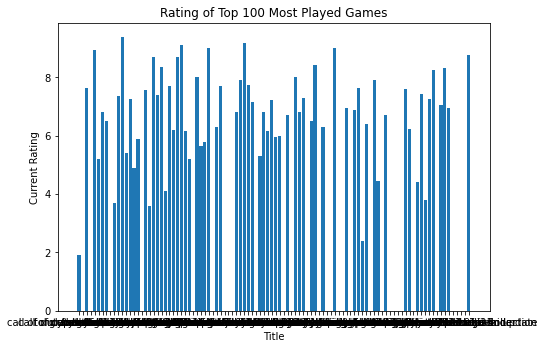

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = x_values
y = y_values
ax.bar(x,y)
plt.xlabel('Title')
plt.ylabel('Current Rating')
plt.title('Rating of Top 100 Most Played Games')
plt.show()

Based on the graph observed, the rating of a game is more or less unrelated to the number of players. The distribution of the graph is still based on popularity (meaning, the x-axis is arranged by popularity in decreasing order). From the graph, even the top 5 most played games have relatively lower ratings than some of the rest of the games that are less popular.

## Are the most played games dominated by multiplayer or singleplayer?

In [39]:
df_ps4_combined_sales['Mode'].value_counts()

single / multiplayer          38
single player                 34
massive online multiplayer     5
multiplayer                    5
Multiplayer mode: Internet     1
Name: Mode, dtype: int64

In [40]:
df_ps4_combined_sales['Mode'] = df_ps4_combined_sales['Mode'].map({'multiplayer': 'multiplayer', 'single player' : 'single player', 'single / multiplayer': 'single / multiplayer', 'massive online multiplayer': 'multiplayer', 'Multiplayer mode: Internet': 'multiplayer'})

In [41]:
df_ps4_combined_sales['Mode'].value_counts()

single / multiplayer    38
single player           34
multiplayer             11
Name: Mode, dtype: int64

We drop the 'Current_Rating' Column.

In [42]:
df_most_played = df_most_played.drop(['Current_Rating'], axis=1)

We add the 'Mode' Column

In [43]:
df_most_played['Mode'] = df_ps4_combined_sales['Mode']

We drop the 'NaN' values.

In [44]:
df_most_played.dropna()

,Hours_Played,Title,Mode
51,93548.333333,fortnite,single / multiplayer
16,80789.333333,call of duty modern warfare,single / multiplayer
0,79539.000000,apex legends,multiplayer
56,78739.333333,grand theft auto v,single player
46,77593.000000,fifa 21,single / multiplayer
...,...,...,...
3,3421.000000,assassin's creed origins,single player
33,3305.500000,doom eternal,single / multiplayer
6,3289.000000,battlefield 1,single / multiplayer
4,3253.000000,assassin's creed the ezio collection,single player


In [45]:
df_most_played['Mode'].value_counts()

single / multiplayer    33
single player           28
multiplayer              9
Name: Mode, dtype: int64

In [46]:
# Split the dataframe into their mode
single_player = df_most_played[df_most_played['Mode'] == 'single player']
multiplayer = df_most_played[df_most_played['Mode'] == 'multiplayer']
single_multi = df_most_played[df_most_played['Mode'] == 'single / multiplayer']

# Give x and y values
x_values = ['Single Player', 'Multiplayer', 'Single / Multiplayer']
y_values = [len(single_player.index), len(multiplayer.index), len(single_multi.index)]

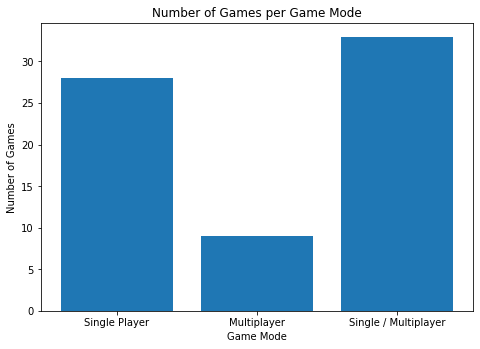

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = x_values
y = y_values
ax.bar(x,y)
plt.xlabel('Game Mode')
plt.ylabel('Number of Games')
plt.title('Number of Games per Game Mode')
plt.show()

## What is the revenue of the most played games (hours played) on the PS4 for the first quarter of 2021 based on singleplayer or multiplayer?

In [48]:
df_ps4_times_sales = df_ps4_combined_sales
df_ps4_times_sales = df_ps4_times_sales.drop(['Tags'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Game_Description'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Release_Date_Day'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Publisher_x'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Total_Shipped'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Current_Rating'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Hours_Played'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Players'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Sessions'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Avg_Session_Seconds'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Count'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Developer'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Release_Date_Month'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Release_Date_Year'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Expected_Rating'], axis=1)
df_ps4_times_sales = df_ps4_times_sales.drop(['Publisher_y'], axis=1)

In [49]:
df_ps4_times_sales = df_ps4_times_sales.dropna()

In [50]:
df_ps4_times_sales

,Title,Mode,Total_Sales,NA_Sales,PAL_Sales,Japan_Sales,Other_Sales
56,grand theft auto v,single player,19.39m,6.06m,9.71m,0.60m,3.02m
71,minecraft,single / multiplayer,6.33m,1.89m,3.13m,0.35m,0.96m
29,destiny 2,single / multiplayer,4.14m,1.92m,1.44m,0.10m,0.69m
26,dead by daylight,multiplayer,0.22m,0.11m,0.06m,0.02m,0.04m
94,shadow of the tomb raider,single player,1.74m,0.59m,0.82m,0.06m,0.27m
2,assassin's creed odyssey,single player,3.18m,1.18m,1.40m,0.09m,0.51m
50,for honor,single / multiplayer,1.75m,0.73m,0.66m,0.07m,0.28m
102,the crew 2,multiplayer,0.82m,0.22m,0.42m,0.05m,0.12m
41,fallout 4,single player,8.48m,2.91m,3.97m,0.27m,1.34m
23,dark souls remastered,single / multiplayer,0.49m,0.13m,0.16m,0.14m,0.06m


In [51]:
df_ps4_times_sales['Mode'] = df_ps4_times_sales['Mode'].map({'multiplayer': 'multiplayer', 'single player' : 'single player', 'single / multiplayer': 'single / multiplayer', 'massive online multiplayer': 'multiplayer', 'Multiplayer mode: Internet': 'multiplayer'})

In [52]:
df_ps4_times_sales = df_ps4_times_sales.reset_index(drop=True)
df_ps4_times_sales

,Title,Mode,Total_Sales,NA_Sales,PAL_Sales,Japan_Sales,Other_Sales
0,grand theft auto v,single player,19.39m,6.06m,9.71m,0.60m,3.02m
1,minecraft,single / multiplayer,6.33m,1.89m,3.13m,0.35m,0.96m
2,destiny 2,single / multiplayer,4.14m,1.92m,1.44m,0.10m,0.69m
3,dead by daylight,multiplayer,0.22m,0.11m,0.06m,0.02m,0.04m
4,shadow of the tomb raider,single player,1.74m,0.59m,0.82m,0.06m,0.27m
5,assassin's creed odyssey,single player,3.18m,1.18m,1.40m,0.09m,0.51m
6,for honor,single / multiplayer,1.75m,0.73m,0.66m,0.07m,0.28m
7,the crew 2,multiplayer,0.82m,0.22m,0.42m,0.05m,0.12m
8,fallout 4,single player,8.48m,2.91m,3.97m,0.27m,1.34m
9,dark souls remastered,single / multiplayer,0.49m,0.13m,0.16m,0.14m,0.06m


In [53]:
df_ps4_times_sales

,Title,Mode,Total_Sales,NA_Sales,PAL_Sales,Japan_Sales,Other_Sales
0,grand theft auto v,single player,19.39m,6.06m,9.71m,0.60m,3.02m
1,minecraft,single / multiplayer,6.33m,1.89m,3.13m,0.35m,0.96m
2,destiny 2,single / multiplayer,4.14m,1.92m,1.44m,0.10m,0.69m
3,dead by daylight,multiplayer,0.22m,0.11m,0.06m,0.02m,0.04m
4,shadow of the tomb raider,single player,1.74m,0.59m,0.82m,0.06m,0.27m
5,assassin's creed odyssey,single player,3.18m,1.18m,1.40m,0.09m,0.51m
6,for honor,single / multiplayer,1.75m,0.73m,0.66m,0.07m,0.28m
7,the crew 2,multiplayer,0.82m,0.22m,0.42m,0.05m,0.12m
8,fallout 4,single player,8.48m,2.91m,3.97m,0.27m,1.34m
9,dark souls remastered,single / multiplayer,0.49m,0.13m,0.16m,0.14m,0.06m


In [54]:
df_ps4_times_sales['Total_Sales'][1]


'6.33m'

In [55]:
Total_sales_cleaned = []
NA_sales_cleaned = []
PAL_sales_cleaned = []
Japan_sales_cleaned = []
Other_sales_cleaned = []
for index, row in df_ps4_times_sales.iterrows():
    row['Total_Sales'] = row['Total_Sales'].replace('m','')
    row['NA_Sales'] = row['NA_Sales'].replace('m','')
    row['PAL_Sales'] = row['PAL_Sales'].replace('m','')
    row['Japan_Sales'] = row['Japan_Sales'].replace('m','')
    row['Other_Sales'] = row['Other_Sales'].replace('m','')
    #print(row['Title'])
    Total_sales_cleaned.append(float(row['Total_Sales']))
    NA_sales_cleaned.append(float(row['NA_Sales']))
    PAL_sales_cleaned.append(float(row['PAL_Sales']))
    Japan_sales_cleaned.append(float(row['Japan_Sales']))
    Other_sales_cleaned.append(float(row['Other_Sales']))
    
df_ps4_times_sales['Total_Sales'] = Total_sales_cleaned
df_ps4_times_sales['NA_Sales'] = NA_sales_cleaned
df_ps4_times_sales['PAL_Sales'] = PAL_sales_cleaned
df_ps4_times_sales['Japan_Sales'] = Japan_sales_cleaned
df_ps4_times_sales['Other_Sales'] = Other_sales_cleaned

In [56]:
df_ps4_times_sales

,Title,Mode,Total_Sales,NA_Sales,PAL_Sales,Japan_Sales,Other_Sales
0,grand theft auto v,single player,19.39,6.06,9.71,0.60,3.02
1,minecraft,single / multiplayer,6.33,1.89,3.13,0.35,0.96
2,destiny 2,single / multiplayer,4.14,1.92,1.44,0.10,0.69
3,dead by daylight,multiplayer,0.22,0.11,0.06,0.02,0.04
4,shadow of the tomb raider,single player,1.74,0.59,0.82,0.06,0.27
5,assassin's creed odyssey,single player,3.18,1.18,1.40,0.09,0.51
6,for honor,single / multiplayer,1.75,0.73,0.66,0.07,0.28
7,the crew 2,multiplayer,0.82,0.22,0.42,0.05,0.12
8,fallout 4,single player,8.48,2.91,3.97,0.27,1.34
9,dark souls remastered,single / multiplayer,0.49,0.13,0.16,0.14,0.06


In [57]:
df_ps4_times_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        25 non-null     object 
 1   Mode         25 non-null     object 
 2   Total_Sales  25 non-null     float64
 3   NA_Sales     25 non-null     float64
 4   PAL_Sales    25 non-null     float64
 5   Japan_Sales  25 non-null     float64
 6   Other_Sales  25 non-null     float64
dtypes: float64(5), object(2)
memory usage: 1.5+ KB


In [58]:
df_ps4_times_sales_agg = df_ps4_times_sales.groupby('Mode').agg(
    Total_Sales = ('Total_Sales', 'sum'),
    NA_Sales = ('NA_Sales', 'sum'),
    PAL_Sales = ('PAL_Sales', 'sum'),
    Japan_Sales = ('Japan_Sales', 'sum'),
    Other_Sales = ('Other_Sales', 'sum'),
)

In [59]:
df_ps4_times_sales_agg

,Total_Sales,NA_Sales,PAL_Sales,Japan_Sales,Other_Sales
Mode,,,,,
multiplayer,1.04,0.33,0.48,0.07,0.16
single / multiplayer,33.78,11.81,15.29,1.40,5.30
single player,54.04,18.52,24.33,2.88,8.35


<BarContainer object of 3 artists>

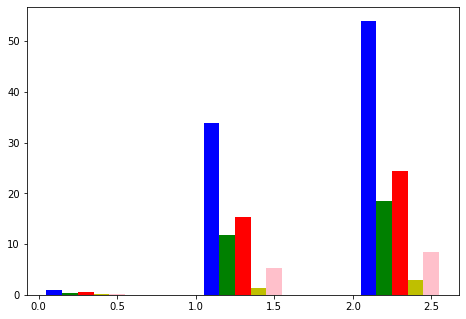

In [60]:
import numpy as np
import matplotlib.pyplot as plt
df_ps4_times_sales_agg['Total_Sales']
fig = plt.figure()
X = np.arange(3)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.10,df_ps4_times_sales_agg['Total_Sales'], color = 'b', width = 0.10)
ax.bar(X + 0.20,df_ps4_times_sales_agg['NA_Sales'], color = 'g', width = 0.10)
ax.bar(X + 0.30,df_ps4_times_sales_agg['PAL_Sales'], color = 'r', width = 0.10)
ax.bar(X + 0.40,df_ps4_times_sales_agg['Japan_Sales'], color = 'y', width = 0.10)
ax.bar(X + 0.50,df_ps4_times_sales_agg['Other_Sales'], color = 'pink', width = 0.10)

### Based on story and gameplay, what are the similarities between the most played games (hours played) on the PS4 for the first quarter of 2021?

In [61]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [81]:
text = " ".join(str(review) for review in df_ps4_combined.Game_Description)

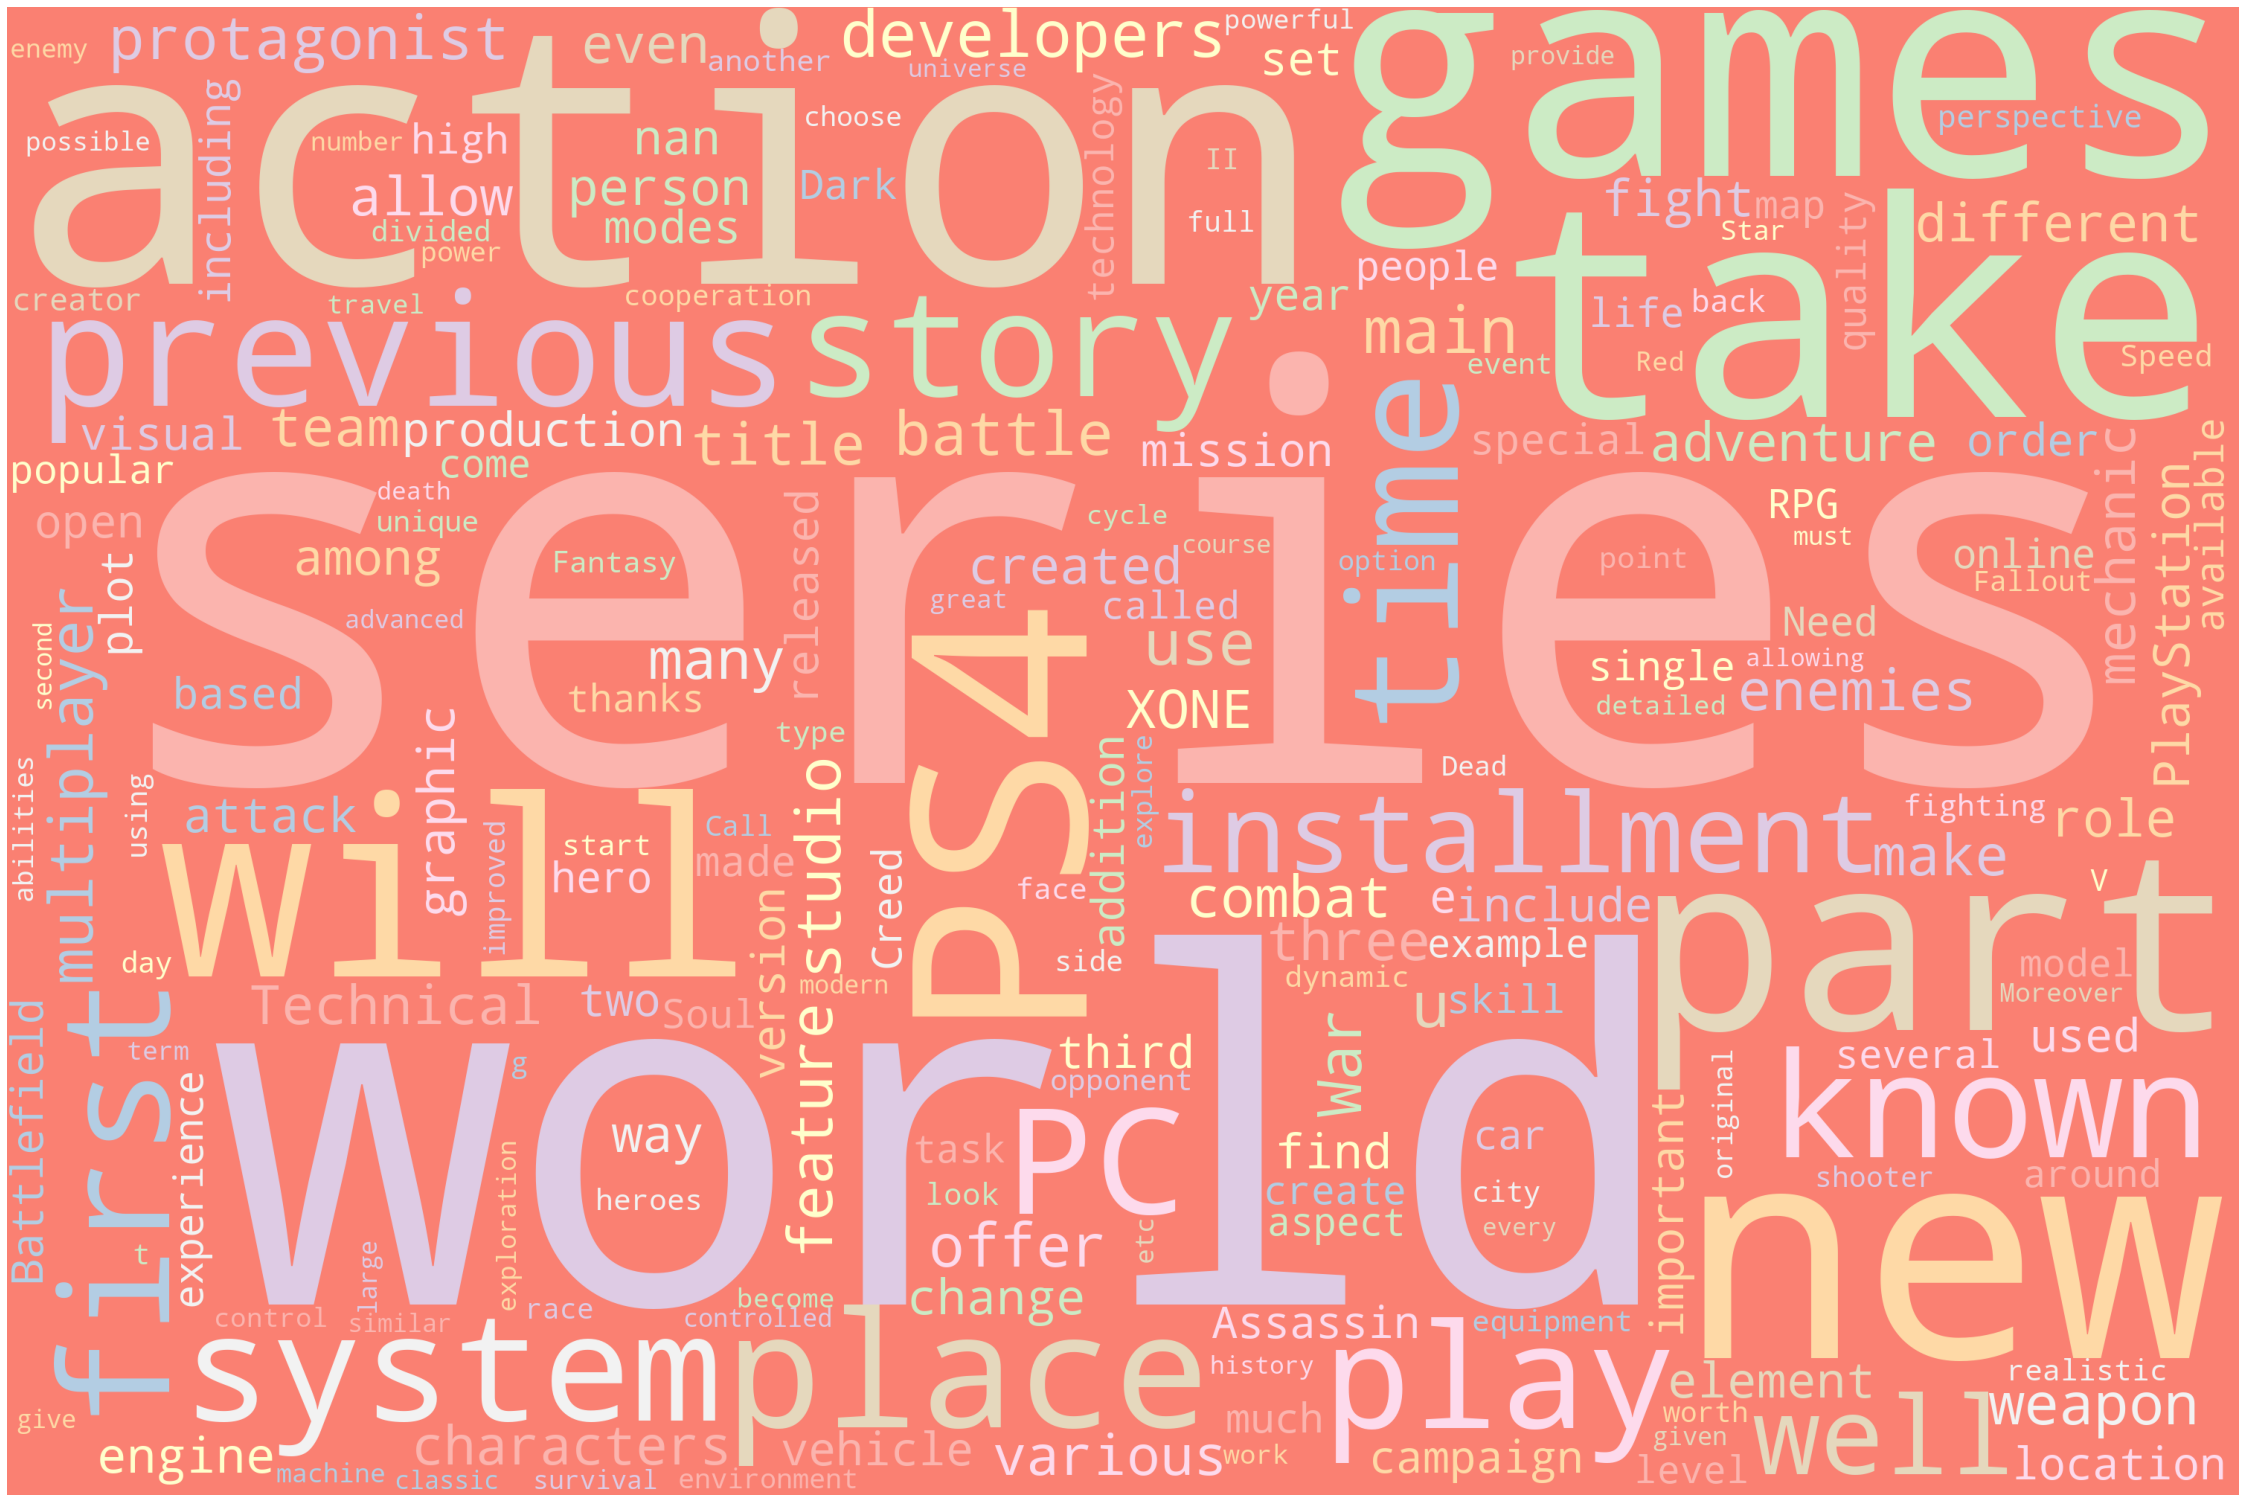

In [103]:
# Import package
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

#stopwords
stopwords = set(STOPWORDS)
stopwords.update(["game", "character", "player", 'players','mode', 'one','gameplay', 'developed', 'developer', 'â', 's'])
''
# Generate word cloud
wc = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

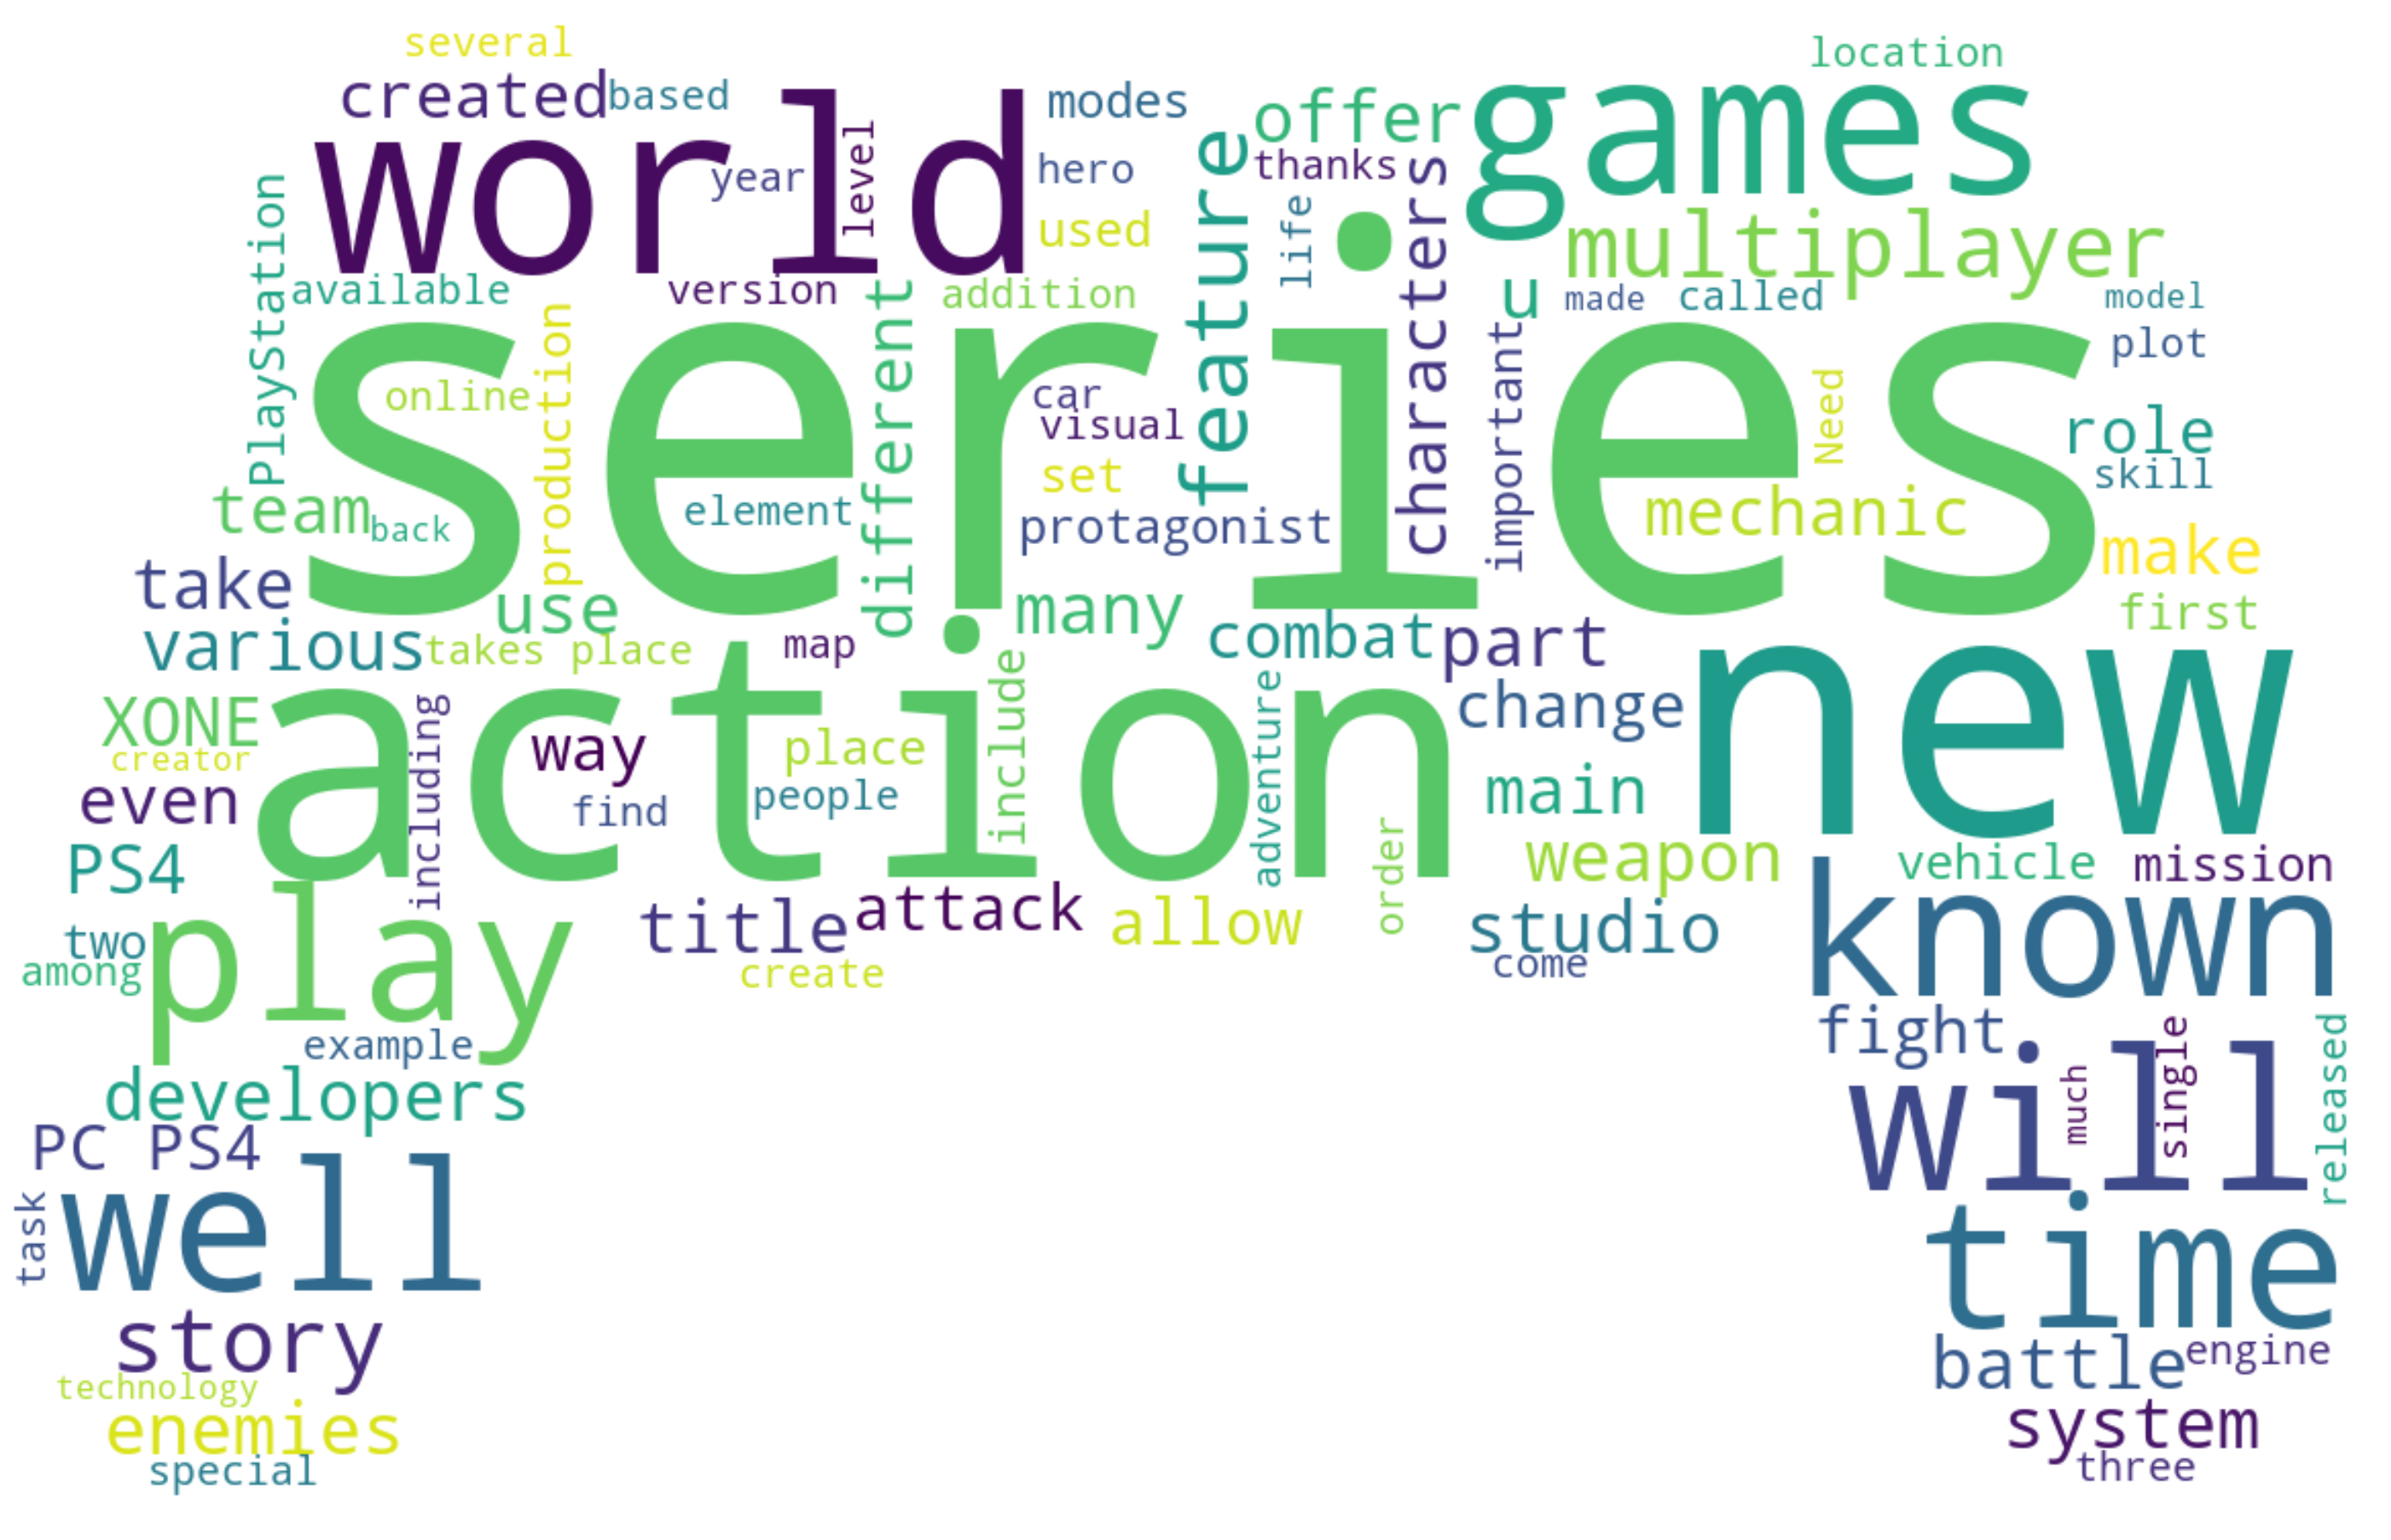

In [132]:
mask = np.array(Image.open('controller.png'))
wc = WordCloud(stopwords=stopwords,
               mask=mask, background_color="white",
               max_words=100, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(text)
plt.figure(figsize=(50,50))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()